# **Predicting_Students_Grade**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **Load dataset**

In [7]:
student_data = pd.read_csv(r'D:\RATHNA\FITA ACADEMY\Kaggle\port.csv')

In [9]:
student_data.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,4,0,11,11
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,2,9,11,11
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,6,12,13,12
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,0,14,14,14
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,0,11,13,13


In [11]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  649 non-null    int64 
 1   school      649 non-null    object
 2   sex         649 non-null    object
 3   age         649 non-null    int64 
 4   address     649 non-null    object
 5   famsize     649 non-null    object
 6   Pstatus     649 non-null    object
 7   Medu        649 non-null    int64 
 8   Fedu        649 non-null    int64 
 9   Mjob        649 non-null    object
 10  Fjob        649 non-null    object
 11  reason      649 non-null    object
 12  guardian    649 non-null    object
 13  traveltime  649 non-null    int64 
 14  studytime   649 non-null    int64 
 15  failures    649 non-null    int64 
 16  schoolsup   649 non-null    object
 17  famsup      649 non-null    object
 18  paid        649 non-null    object
 19  activities  649 non-null    object
 20  nursery   

In [19]:

student_data = student_data.drop('Unnamed: 0', axis=1)

In [21]:
student_data.shape

(649, 33)

In [23]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [25]:
student_data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [27]:
# Splitting into numerical and categorical columns
num_cols = student_data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = student_data.select_dtypes(include=[object]).columns.tolist()

In [31]:
for col in cat_cols:
     student_data[col] = student_data[col].astype('category')

In [33]:
result = student_data.select_dtypes(include='category')
for i in result:
    print(result[i].value_counts())
    print('\n')

school
GP    423
MS    226
Name: count, dtype: int64


sex
F    383
M    266
Name: count, dtype: int64


address
U    452
R    197
Name: count, dtype: int64


famsize
GT3    457
LE3    192
Name: count, dtype: int64


Pstatus
T    569
A     80
Name: count, dtype: int64


Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64


Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64


reason
course        285
home          149
reputation    143
other          72
Name: count, dtype: int64


guardian
mother    455
father    153
other      41
Name: count, dtype: int64


schoolsup
no     581
yes     68
Name: count, dtype: int64


famsup
yes    398
no     251
Name: count, dtype: int64


paid
no     610
yes     39
Name: count, dtype: int64


activities
no     334
yes    315
Name: count, dtype: int64


nursery
yes    521
no     128
Name: count, dtype: int64


higher
yes    580
no      

# **Univarate Analysis**

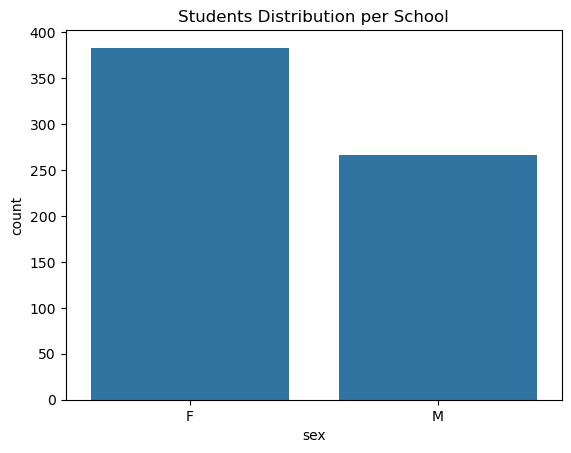

In [38]:
# Students Distribution by School
sns.countplot(x=student_data['sex'], data=student_data)
plt.title("Students Distribution per School")
plt.show()

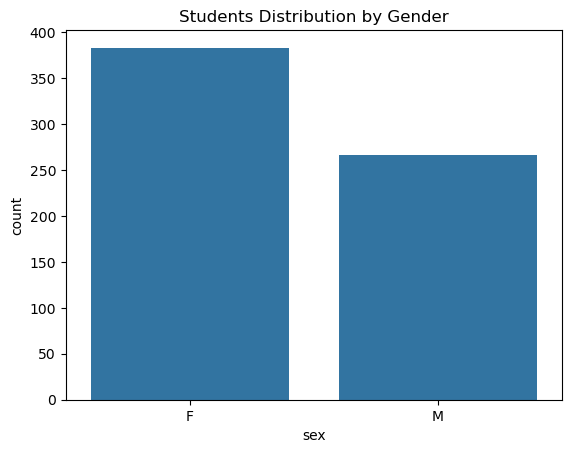

In [40]:
# Students Distribution by Gender
sns.countplot(x=student_data['sex'], data=student_data)
plt.title("Students Distribution by Gender")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25112\4290379219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=student_data['famsize'], data=student_data, palette= 'viridis')


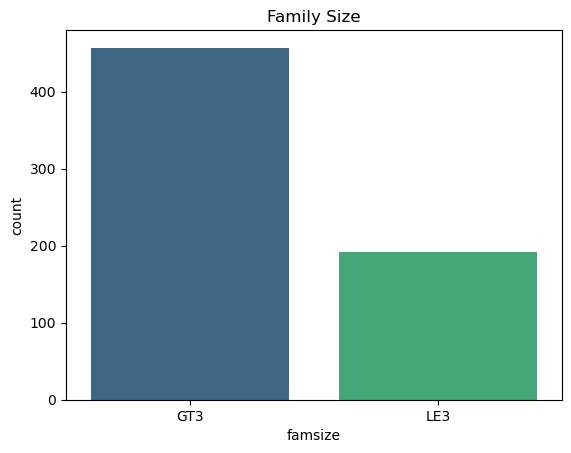

In [52]:
# Family Size
sns.countplot(x=student_data['famsize'], data=student_data, palette= 'viridis')
plt.title("Family Size")
plt.show()

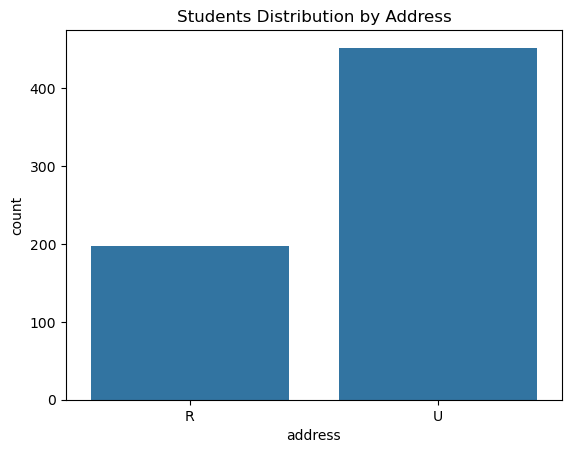

In [54]:
#Students Distribution by Address

sns.countplot(x=student_data['address'], data=student_data)
plt.title("Students Distribution by Address")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25112\2472676953.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=student_data['Dalc'], data=student_data,palette='viridis')


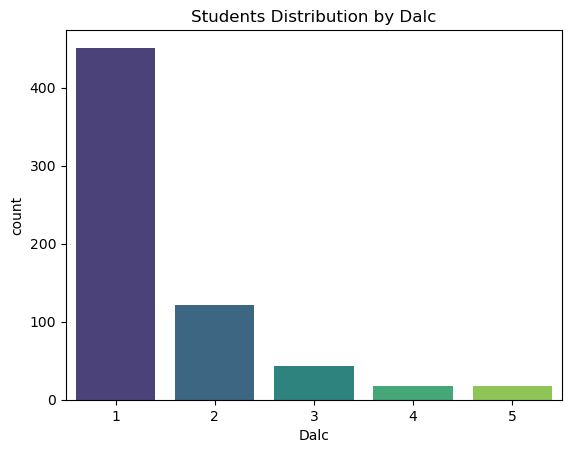

In [56]:
#Students Distribution by Dalc

sns.countplot(x=student_data['Dalc'], data=student_data,palette='viridis')
plt.title("Students Distribution by Dalc")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25112\3213103315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=student_data['Walc'], data=student_data,palette='viridis')


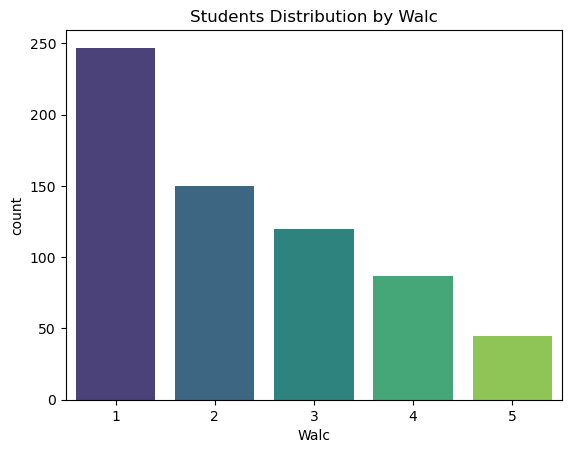

In [58]:
#Students Distribution by Walc

sns.countplot(x=student_data['Walc'], data=student_data,palette='viridis')
plt.title("Students Distribution by Walc")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25112\2111701975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=student_data['health'], data=student_data,palette='viridis')


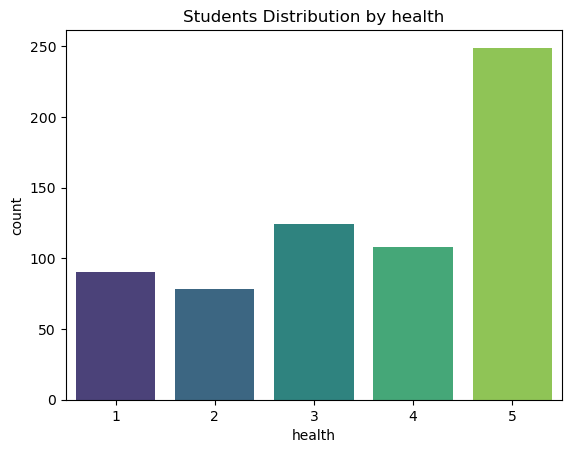

In [60]:
#Students Distribution by health

sns.countplot(x=student_data['health'], data=student_data,palette='viridis')
plt.title("Students Distribution by health")
plt.show()

# **Distribution of Numerical Varriable**

C:\Users\User\AppData\Local\Temp\ipykernel_25112\1158375668.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='age', data=student_data,palette="Set3",kde=True,bins=10)


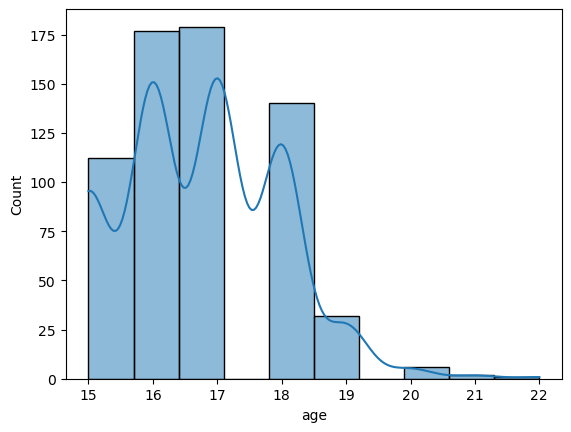

In [65]:
plt.figure() 
sns.histplot(x='age', data=student_data,palette="Set3",kde=True,bins=10)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25112\2834809031.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='G1', data=student_data,palette="Set3",kde=True,bins=10)


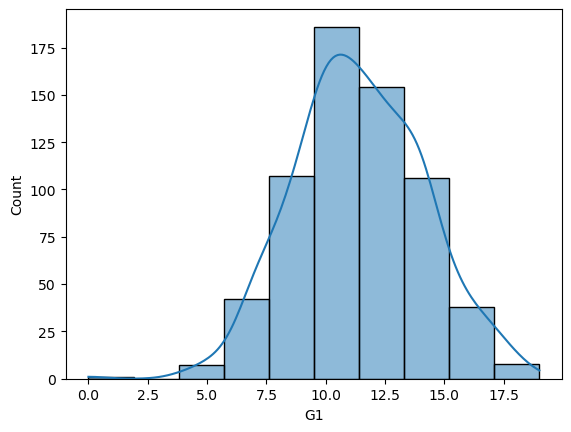

In [67]:
plt.figure() 
sns.histplot(x='G1', data=student_data,palette="Set3",kde=True,bins=10)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25112\4074301902.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='G2', data=student_data,palette="Set3",kde=True,bins=10)


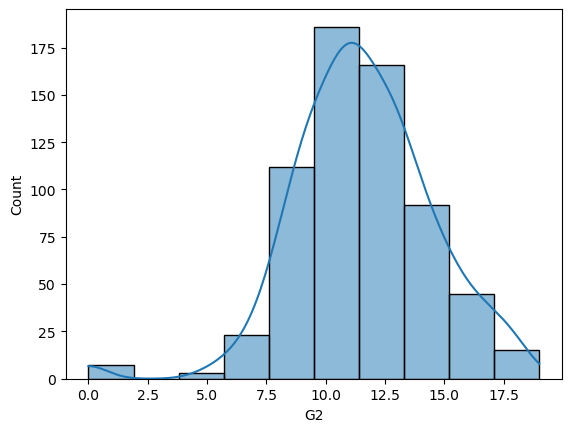

In [69]:
plt.figure() 
sns.histplot(x='G2', data=student_data,palette="Set3",kde=True,bins=10)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25112\502335420.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='G3', data=student_data,palette="Set3",kde=True,bins=10)


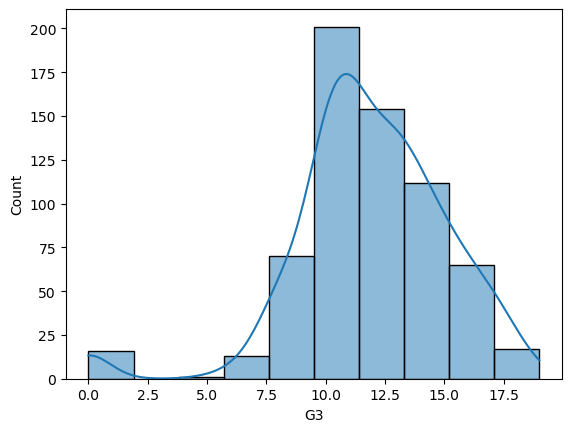

In [71]:
plt.figure() 
sns.histplot(x='G3', data=student_data,palette="Set3",kde=True,bins=10)
plt.show()

# **Bivariate Analysis**

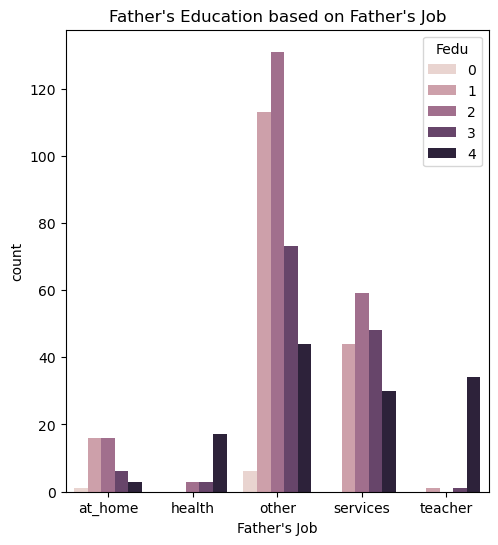

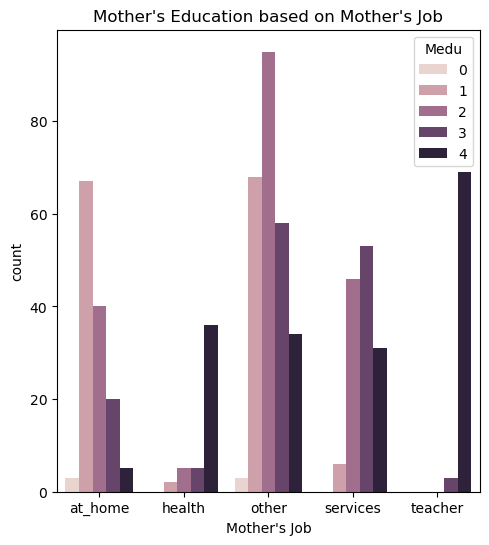

In [74]:
# Parent's Education based on Parent's Job
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x=student_data['Fjob'], data=student_data, hue=student_data['Fedu'])
plt.title("Father's Education based on Father's Job")
plt.xlabel("Father's Job")
plt.show()
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
sns.countplot(x=student_data['Mjob'], data=student_data, hue=student_data['Medu'])
plt.title("Mother's Education based on Mother's Job")
plt.xlabel("Mother's Job")
plt.show()

<Axes: xlabel='sex', ylabel='count'>

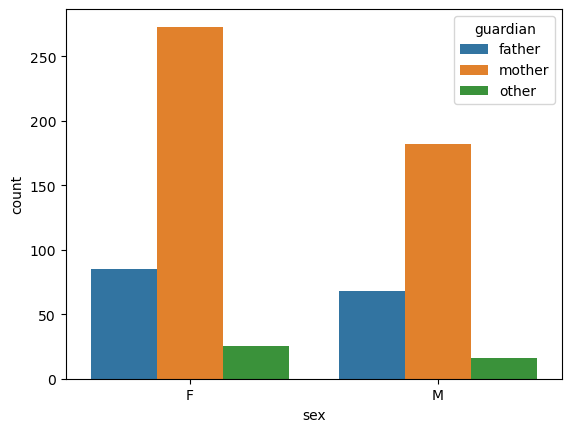

In [76]:
# Students Guardian
sns.countplot(x=student_data['sex'], data=student_data, hue=student_data['guardian'])

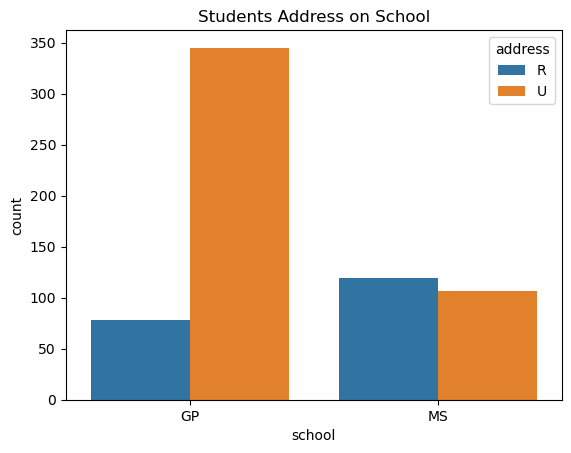

In [78]:
# Students' Address based on School
sns.countplot(x=student_data['school'], data=student_data, hue=student_data['address'])
plt.title("Students Address on School")
plt.show()

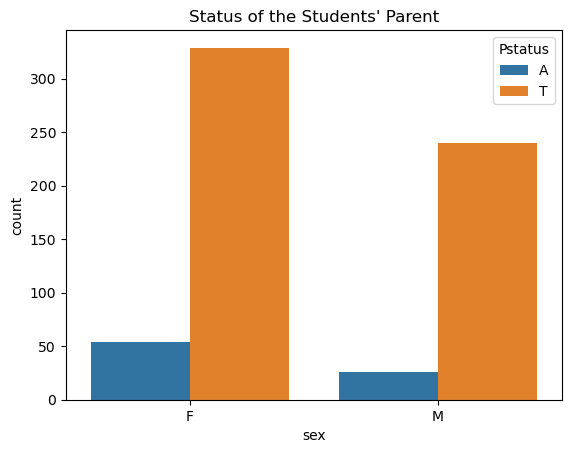

In [80]:
#Parent Status of the Students
sns.countplot(x=student_data['sex'], data=student_data, hue=student_data['Pstatus'])
plt.title("Status of the Students' Parent")
plt.show()

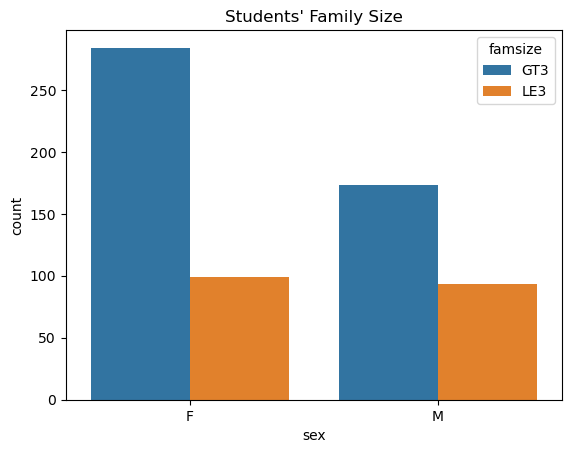

In [82]:
#Family Size of the Students
sns.countplot(x=student_data['sex'], data=student_data, hue=student_data['famsize'])
plt.title("Students' Family Size")
plt.show()

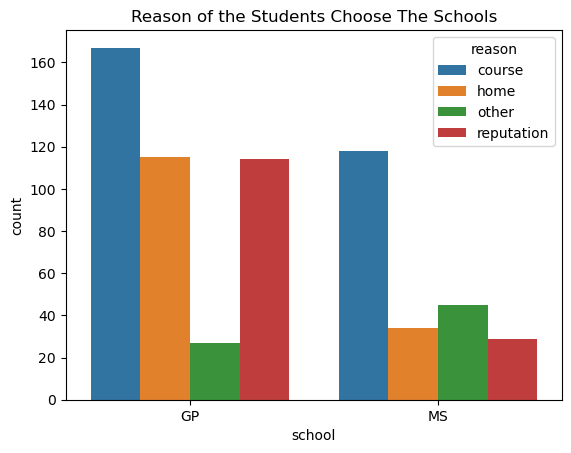

In [84]:
sns.countplot(x=student_data['school'], data=student_data, hue=student_data['reason'])
plt.title("Reason of the Students Choose The Schools")
plt.show()

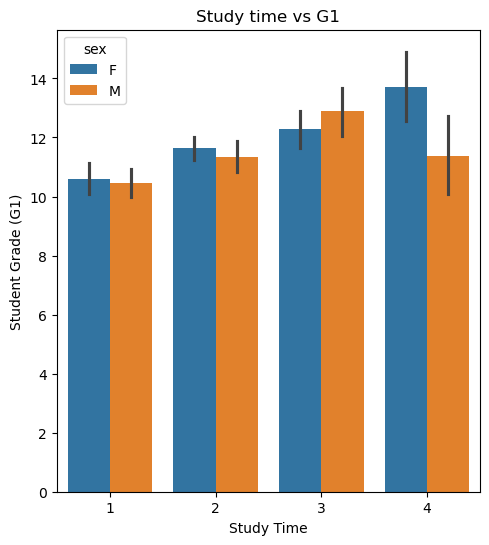

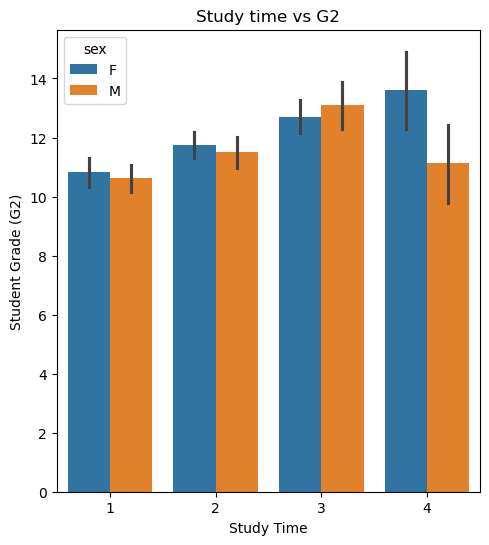

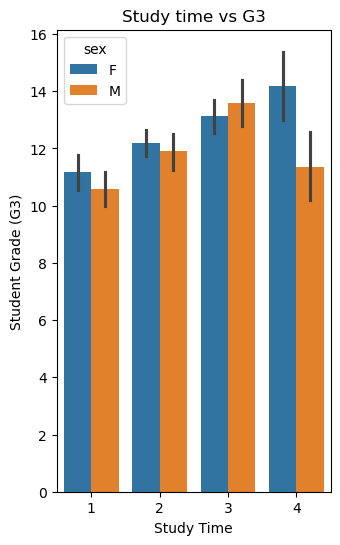

In [92]:
# Student Grade  based on Time and Gender
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=student_data['studytime'], y=student_data['G1'], data=student_data, hue=student_data['sex'])
plt.title("Study time vs G1")
plt.xlabel("Study Time")
plt.ylabel("Student Grade (G1)")
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
sns.barplot(x=student_data['studytime'], y=student_data['G2'], data=student_data, hue=student_data['sex'])
plt.title("Study time vs G2")
plt.xlabel("Study Time")
plt.ylabel("Student Grade (G2)")
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(1,3,3)
sns.barplot(x=student_data['studytime'], y=student_data['G3'], data=student_data, hue=student_data['sex'])
plt.title("Study time vs G3")
plt.xlabel("Study Time")
plt.ylabel("Student Grade (G3)")
plt.show()

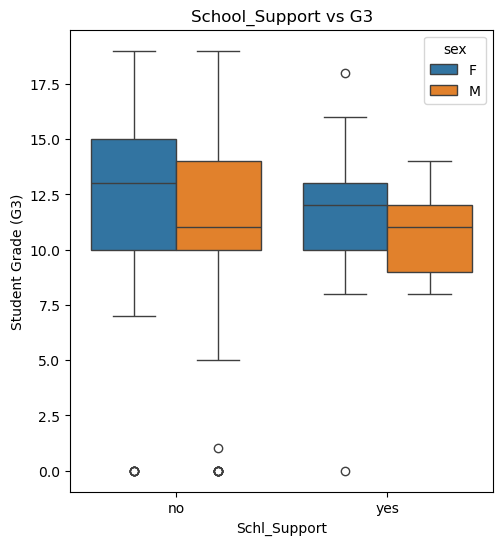

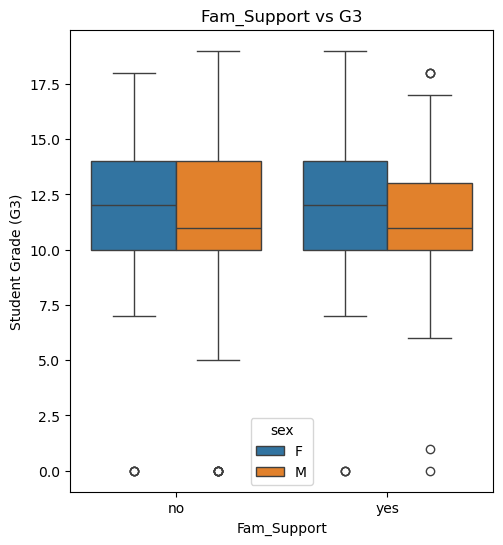

In [104]:
# Student Grade  based on Support from school and family
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x=student_data['schoolsup'], y=student_data['G3'], data=student_data, hue=student_data['sex'])
plt.title("School_Support vs G3")
plt.xlabel("Schl_Support")
plt.ylabel("Student Grade (G3)")
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
sns.boxplot(x=student_data['famsup'], y=student_data['G3'], data=student_data, hue=student_data['sex'])
plt.title("Fam_Support vs G3")
plt.xlabel("Fam_Support")
plt.ylabel("Student Grade (G3)")
plt.show()
    


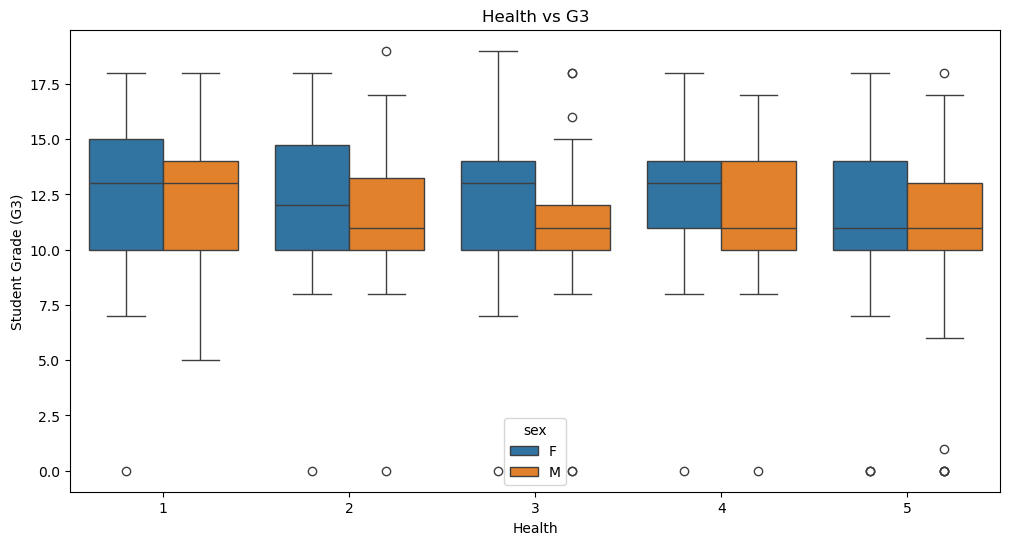

In [106]:

plt.figure(figsize=(12,6))
sns.boxplot(x="health", y=student_data['G3'], data=student_data, hue=student_data['sex'])
plt.title("Health vs G3")
plt.xlabel("Health")
plt.ylabel("Student Grade (G3)")
plt.show()

<Axes: xlabel='G3', ylabel='Density'>

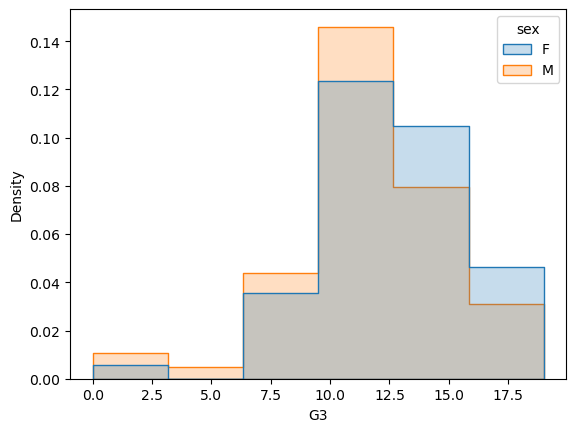

In [110]:
# G3
sns.histplot(student_data, x="G3", hue="sex", element="step",stat="density", common_norm=False,bins=6)

<Axes: xlabel='G3', ylabel='Count'>

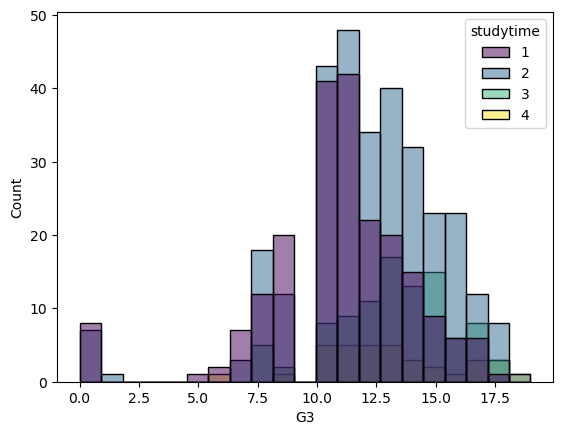

In [120]:
sns.histplot(student_data, x="G3", hue="studytime",palette='viridis')

In [122]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()

for column in cat_cols:
    
    student_data[column] = le.fit_transform(student_data[column])

In [124]:
student_data_encoded = pd.get_dummies(student_data, columns=cat_cols, drop_first=True)

In [126]:
# Features and target variable

X = student_data_encoded.drop(columns=['G3'])  # Features (all columns except 'G3')
y = student_data_encoded['G3']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
# Scale the data

StandardScaler = StandardScaler()
StandardScaler.fit(X)
X_scaled = StandardScaler.transform(X)

In [132]:
linear_model = LinearRegression()

In [134]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [136]:
y_pred_linear = linear_model.predict(X_test)

In [138]:
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R2 Score:", r2_score(y_test, y_pred_linear))
print("Coefficients:", linear_model.coef_)
print("\n")

Linear Regression:
Mean Squared Error: 1.4759092563639302
R2 Score: 0.8486513286537316
Coefficients: [ 0.00596175 -0.14859443  0.03837821  0.10954096  0.06169591 -0.21070582
 -0.04174922 -0.1071478   0.01769227 -0.06986901  0.02693422 -0.05519845
  0.0115437   0.1721725   0.85883363 -0.30455148 -0.08359911  0.10478066
  0.07862527 -0.0235799   0.34300007 -0.12582091  0.25992253  0.30268193
 -0.30857047 -0.33055305 -0.53062993 -0.53576938 -0.12367499 -0.41871
 -0.14401519 -0.00869322  0.32254835 -0.15765791  0.12045871 -0.19235757
 -0.0394722  -0.06090104  0.05089595  0.11286848  0.06072236]




In [140]:
#L1 Regularization (Lasso)
lasso_model = Lasso(alpha=0.1) 

In [142]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [144]:
y_pred_lasso = lasso_model.predict(X_test)

In [146]:
print("Lasso (L1 Regularization):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("Coefficients:", lasso_model.coef_)
print("\n")

Lasso (L1 Regularization):
Mean Squared Error: 1.3430258481964774
R2 Score: 0.8622779978973782
Coefficients: [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -7.77184212e-03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.45326749e-04
  1.68863870e-02  1.82403230e-01  8.77879340e-01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]




In [148]:
 #L2 Regularization (Ridge)
ridge_model = Ridge(alpha=0.01)

In [150]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [152]:
y_pred_ridge = ridge_model.predict(X_test)

In [154]:
print("Ridge (L2 Regularization):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print("Coefficients:", ridge_model.coef_)

Ridge (L2 Regularization):
Mean Squared Error: 1.4758935619733946
R2 Score: 0.8486529380515621
Coefficients: [ 0.0059779  -0.14853976  0.03832241  0.10951632  0.06169142 -0.21067126
 -0.04176457 -0.10713022  0.01768844 -0.06989263  0.02693369 -0.05519944
  0.0115472   0.17218024  0.85883263 -0.30448838 -0.08356745  0.10479295
  0.07864537 -0.02357749  0.34263412 -0.12596122  0.25972103  0.30236567
 -0.30765599 -0.32997739 -0.53000768 -0.53484606 -0.12362971 -0.41865234
 -0.14399356 -0.00872064  0.32239087 -0.15761766  0.12048032 -0.19231061
 -0.03945406 -0.06088649  0.0508879   0.11287699  0.06071653]


In [156]:
#Decision Tree Regressor

X = student_data_encoded.drop(columns=['G3'])  # Features (all columns except 'G3')
y = student_data_encoded['G3']


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:

dt_regressor = DecisionTreeRegressor(max_depth= 4,random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [162]:
# Make predictions
y_pred_dt = dt_regressor.predict(X_test)

In [164]:
# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [166]:
# Display the results
print("\nDecision Tree Regressor Results:")
print(f"Mean Squared Error: {mse_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")


Decision Tree Regressor Results:
Mean Squared Error: 1.50
R² Score: 0.85


In [168]:
#Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [170]:
# Predict and evaluate
y_pred = rf_regressor.predict(X_test)

In [172]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1.54
R-squared: 0.84


In [174]:
#XGBoost Model
import xgboost as xgb

In [176]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=5, n_estimators=100)

In [178]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [180]:
y_pred_xgb = xgb_model.predict(X_test)

In [182]:
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R2 square:", np.sqrt(r2_score(y_test, y_pred_xgb)))

XGBoost RMSE: 1.2892073576168923
XGBoost R2 square: 0.9108033566003435


In [184]:
import lightgbm as lgb

In [186]:
lgb_model = lgb.LGBMRegressor(objective='regression', learning_rate=0.1, max_depth=5, n_estimators=100,force_col_wise=True)

In [188]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 519, number of used features: 40
[LightGBM] [Info] Start training from score 11.793834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

LGBMRegressor(force_col_wise=True, max_depth=5, objective='regression')

In [190]:
y_pred_lgb = lgb_model.predict(X_test)

In [192]:
print("LightGBM RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgb)))
print("LightGBM R2:", np.sqrt(r2_score(y_test, y_pred_lgb)))

LightGBM RMSE: 1.3484999911781654
LightGBM R2: 0.9019561511118558
